In [10]:
# Carregar os dados
import pandas as pd

# Carregar o dataset Walmart
df = pd.read_csv('walmart.csv')

# Estatísticas básicas
print(df.describe())

# Limitar o dataset a 50.000 observações
df_reduzido = df.head(50000)

# Criar uma sequência de datas diárias para 50.000 observações
df_reduzido['Date'] = pd.date_range(start='2020-01-01', periods=len(df_reduzido), freq='D')

# Verificar as primeiras linhas para garantir que a coluna 'Date' foi adicionada corretamente
print(df_reduzido.head())

# Agora podemos continuar com o EDA, incluindo a coluna de data


            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P002

/tmp/ipykernel_827/3003079105.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduzido['Date'] = pd.date_range(start='2020-01-01', periods=len(df_reduzido), freq='D')


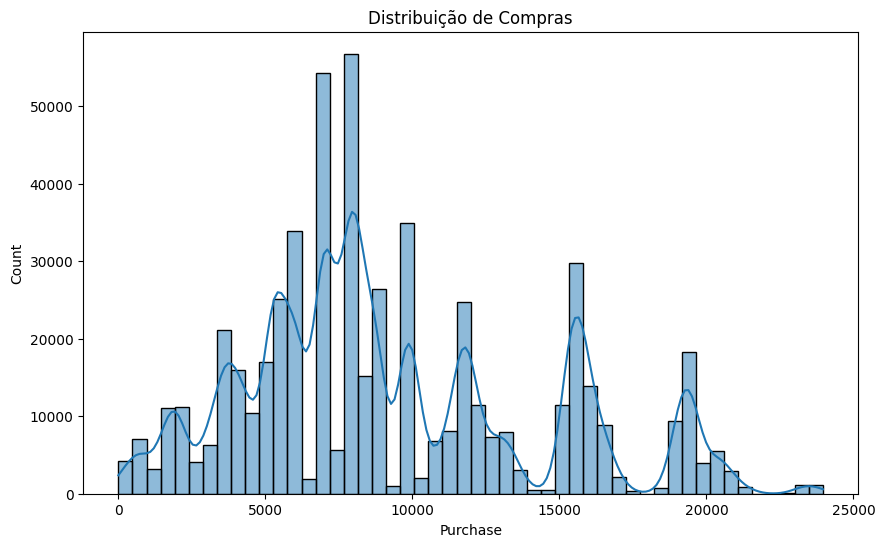

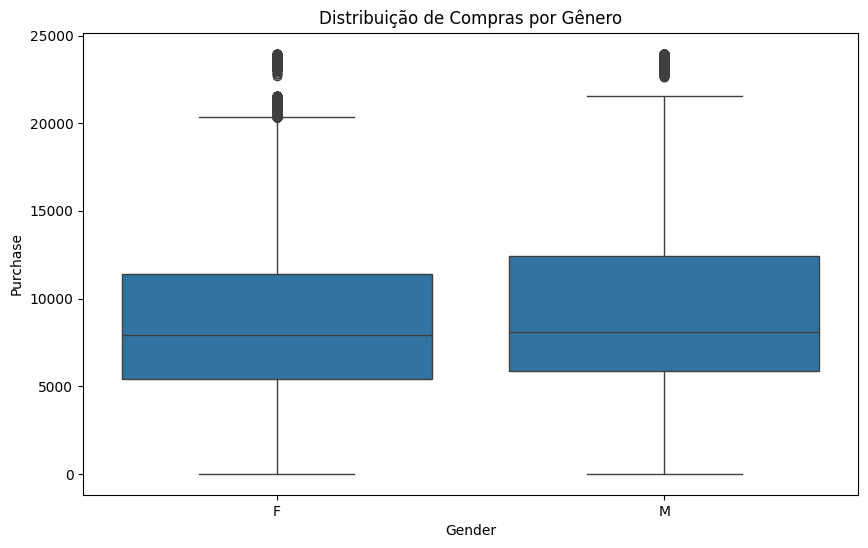

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição das compras
plt.figure(figsize=(10,6))
sns.histplot(df['Purchase'], bins=50, kde=True)
plt.title('Distribuição de Compras')
plt.show()

# Análise da variável 'Gender' em relação a 'Purchase'
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Distribuição de Compras por Gênero')
plt.show()


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset Walmart
df = pd.read_csv('walmart.csv')

# Identificar colunas categóricas que precisam de conversão
categorical_columns = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 
                       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

# Usar LabelEncoder para converter variáveis categóricas em numéricas
labelencoder = LabelEncoder()

for col in categorical_columns:
    df[col] = labelencoder.fit_transform(df[col])

# Verificar se as variáveis categóricas foram convertidas corretamente
print(df.head())

# Agora que as variáveis categóricas foram convertidas, você pode continuar com o EDA



   User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001         672       0    0          10              0   
1  1000001        2376       0    0          10              0   
2  1000001         852       0    0          10              0   
3  1000001         828       0    0          10              0   
4  1000002        2734       1    6          16              2   

   Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           2               0                 2      8370  
1                           2               0                 0     15200  
2                           2               0                11      1422  
3                           2               0                11      1057  
4                           4               0                 7      7969  


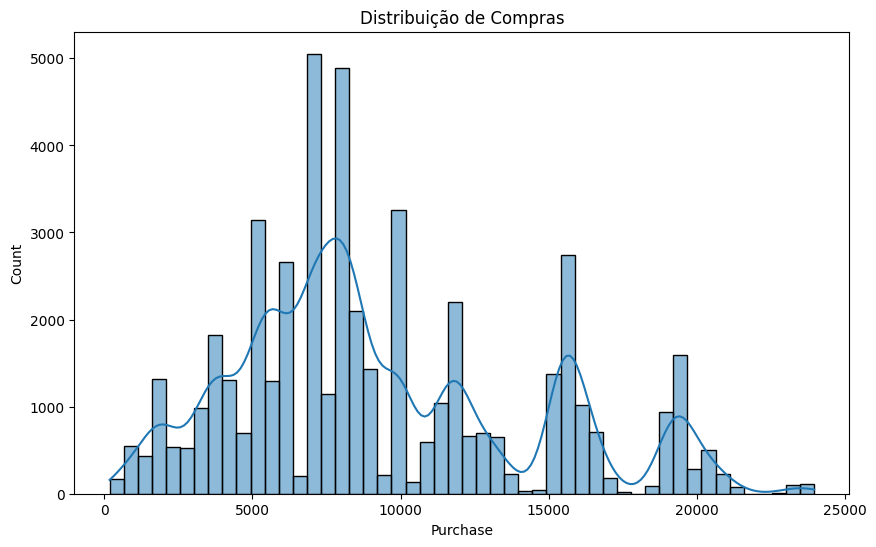

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição das compras
plt.figure(figsize=(10,6))
sns.histplot(df_reduzido['Purchase'], bins=50, kde=True)
plt.title('Distribuição de Compras')
plt.show()


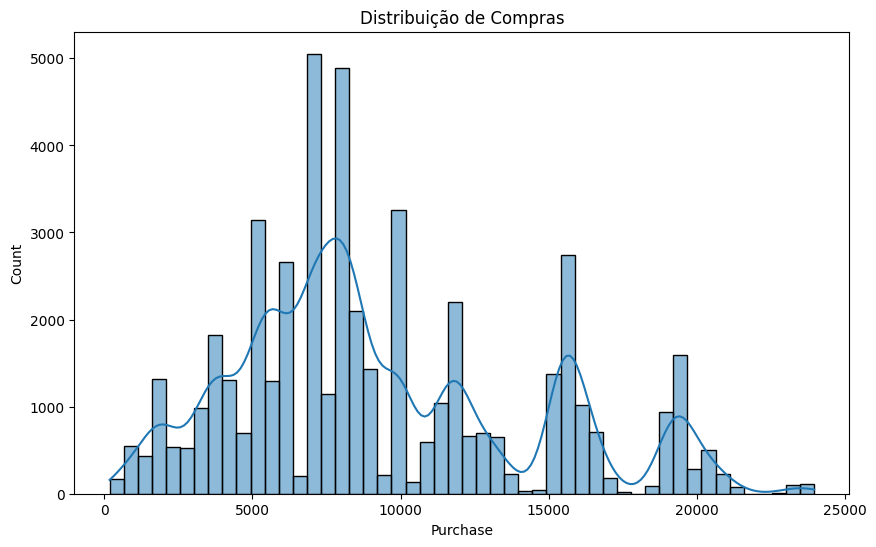

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição das compras
plt.figure(figsize=(10,6))
sns.histplot(df_reduzido['Purchase'], bins=50, kde=True)
plt.title('Distribuição de Compras')
plt.show()


/tmp/ipykernel_827/3953083241.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_reduzido['Purchase'].resample('M').sum()


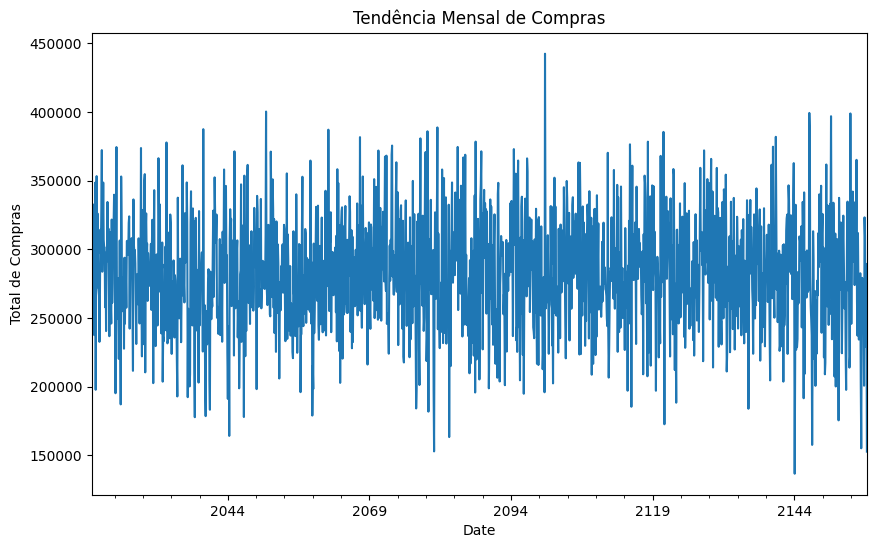

In [15]:
# Agrupar por mês para ver a tendência mensal de compras
df_reduzido.set_index('Date', inplace=True)
monthly_sales = df_reduzido['Purchase'].resample('M').sum()

# Plotar tendência mensal
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title('Tendência Mensal de Compras')
plt.ylabel('Total de Compras')
plt.show()


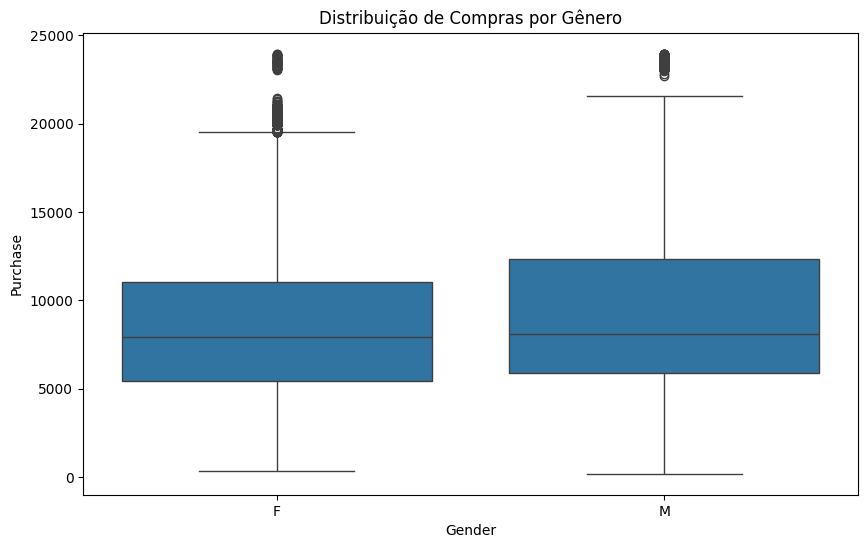

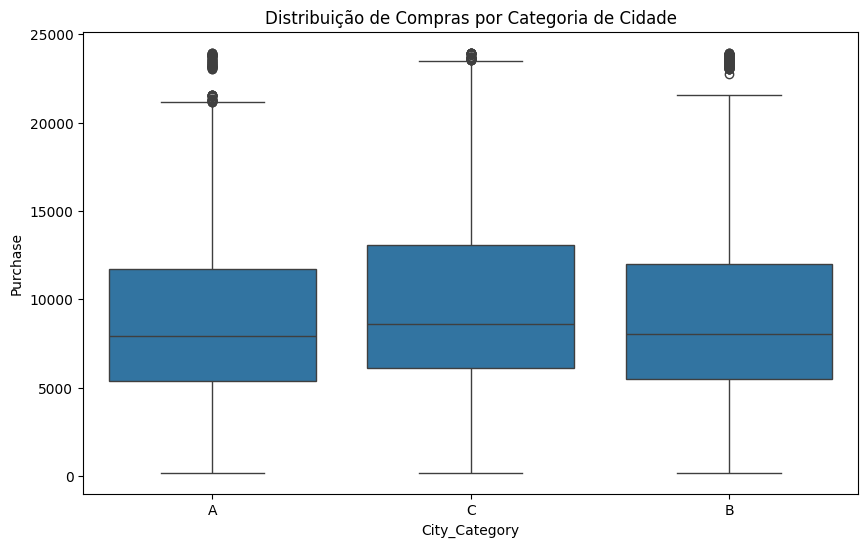

In [17]:
# Boxplot de compras por gênero
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Purchase', data=df_reduzido)
plt.title('Distribuição de Compras por Gênero')
plt.show()

# Boxplot de compras por categoria de cidade
plt.figure(figsize=(10,6))
sns.boxplot(x='City_Category', y='Purchase', data=df_reduzido)
plt.title('Distribuição de Compras por Categoria de Cidade')
plt.show()
